## Concatenacion de archivos robos-recuperos 2022-2024

In [1]:
import pandas as pd
import glob
import os
pd.set_option('display.max_columns', None)
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la ruta completa de la carpeta "pupeta" dentro de la carpeta "archivos"
ruta_r_r = os.path.join(os.getcwd(), 'Archivos', 'robos-recuperos')
archivos_csv = glob.glob(os.path.join(ruta_r_r, '*.csv'))

# Crear una lista para almacenar los DataFrames de cada archivo CSV
dfs = []

# Cargar y concatenar los DataFrames de cada archivo CSV
for archivo in archivos_csv:
    df = pd.read_csv(archivo)
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
rob_rec = pd.concat(dfs, ignore_index=True)

# Convierte la columna 'fecha_registro' al tipo datetime
rob_rec['tramite_fecha'] = pd.to_datetime(rob_rec['tramite_fecha'])

# Agrega columnas para día, mes y año
rob_rec['dia_registro'] = rob_rec['tramite_fecha'].dt.day
rob_rec['mes_registro'] = rob_rec['tramite_fecha'].dt.month
rob_rec['año_registro'] = rob_rec['tramite_fecha'].dt.year

# Guardar el DataFrame combinado en un archivo CSV
rob_rec.to_csv('dnrpa-robos-recuperos-autos-total.csv', index=False)

print(f"Se ha creado el archivo 'dnrpa-robos-recuperos-autos-total.csv' con todos los datos combinados de la carpeta '{ruta_r_r}'.")


Se ha creado el archivo 'dnrpa-robos-recuperos-autos-total.csv' con todos los datos combinados de la carpeta 'C:\Users\Matil\DB_autos_sin_procesar\Archivos\robos-recuperos'.


## Concatenacion de archivos transferencias 2022-2024

#### Al concatenar nos arroja un warning al leer el archivo en la columna 8 por tener tipo de datos mixtos. <ipython-input-2- 74c7ed8a38c0>:14: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.

In [2]:
# Obtener la ruta completa de la carpeta "pupeta" dentro de la carpeta "archivos"
ruta_t = os.path.join(os.getcwd(), 'Archivos', 'transferencias')
archivos_csv = glob.glob(os.path.join(ruta_t, '*.csv'))

# Crear una lista para almacenar los DataFrames de cada archivo CSV
dfs = []

# Cargar y concatenar los DataFrames de cada archivo CSV
for archivo in archivos_csv:
    dtypes = str
    df = pd.read_csv(archivo, dtype = dtypes)
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
transferencias = pd.concat(dfs, ignore_index=True)

# Convierte la columna 'fecha_registro' al tipo datetime
transferencias['tramite_fecha'] = pd.to_datetime(transferencias['tramite_fecha'])

# Agrega columnas para día, mes y año
transferencias['dia_registro'] = transferencias['tramite_fecha'].dt.day
transferencias['mes_registro'] = transferencias['tramite_fecha'].dt.month
transferencias['año_registro'] = transferencias['tramite_fecha'].dt.year

# Guardar el DataFrame combinado en un archivo CSV
transferencias.to_csv('dnrpa-transferencias-autos-total.csv', index=False)

print(f"Se ha creado el archivo 'dnrpa-transferencias-autos-total.csv' con todos los datos combinados de la carpeta '{ruta_t}'.")


Se ha creado el archivo 'dnrpa-transferencias-autos-total.csv' con todos los datos combinados de la carpeta 'C:\Users\Matil\DB_autos_sin_procesar\Archivos\transferencias'.


In [76]:
# Definir las columnas a convertir y sus tipos de datos
columnas_a_convertir = {'tramite_tipo': str,'registro_seccional_descripcion': str,'registro_seccional_provincia': str,
                        'automotor_origen': str,'automotor_tipo_codigo': str,'automotor_tipo_descripcion': str,
                        'automotor_marca_codigo': str,'automotor_marca_descripcion': str, 'automotor_modelo_codigo': str,
                        'automotor_modelo_descripcion': str,'automotor_uso_descripcion': str, 'titular_tipo_persona': str,
                        'titular_domicilio_localidad': str,'titular_domicilio_provincia': str,'titular_genero': str,
                        'titular_pais_nacimiento': str}

# Convertir las columnas al tipo de datos deseado
transferencias = transferencias.astype(columnas_a_convertir)
#transferencias= transferencias.astype(str)
#transferencias.info()
#transferencias.dtypes

In [17]:
transferencias.info()
for i in transferencias.columns:
    if len(transferencias[transferencias[i].isna()])>0:
        print(i+' tiene '+ str(len(transferencias[transferencias[i].isna()]))+' valores nulos')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554385 entries, 0 to 3554384
Data columns (total 28 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   tramite_tipo                    object        
 1   tramite_fecha                   datetime64[ns]
 2   fecha_inscripcion_inicial       object        
 3   registro_seccional_codigo       int64         
 4   registro_seccional_descripcion  object        
 5   registro_seccional_provincia    object        
 6   automotor_origen                object        
 7   automotor_anio_modelo           float64       
 8   automotor_tipo_codigo           object        
 9   automotor_tipo_descripcion      object        
 10  automotor_marca_codigo          object        
 11  automotor_marca_descripcion     object        
 12  automotor_modelo_codigo         object        
 13  automotor_modelo_descripcion    object        
 14  automotor_uso_codigo            float64       
 15

### Notamos que ambas bases tienen los mismos campos. Por cuestiones de uso de memoria vamos a comenzar analizando la base mas pequeña.

### Tenemos valores nulos en los siguientes campos

In [3]:

'''
 2   fecha_inscripcion_inicial       94627 non-null  object#
 7   automotor_anio_modelo           94440 non-null  float64#
 8   automotor_tipo_codigo           91941 non-null  object               
 10  automotor_marca_codigo          93474 non-null  object             
 12  automotor_modelo_codigo         93330 non-null  object            
 14  automotor_uso_codigo            94624 non-null  float64#
 15  automotor_uso_descripcion       94624 non-null  object #              
 17  titular_domicilio_localidad     94537 non-null  object              
 20  titular_anio_nacimiento         94613 non-null  float64#
 24  titular_pais_nacimiento_id      89331 non-null  object    
 '''
rob_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94628 entries, 0 to 94627
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tramite_tipo                    94628 non-null  object        
 1   tramite_fecha                   94628 non-null  datetime64[ns]
 2   fecha_inscripcion_inicial       94627 non-null  object        
 3   registro_seccional_codigo       94628 non-null  int64         
 4   registro_seccional_descripcion  94628 non-null  object        
 5   registro_seccional_provincia    94628 non-null  object        
 6   automotor_origen                94628 non-null  object        
 7   automotor_anio_modelo           94440 non-null  float64       
 8   automotor_tipo_codigo           91941 non-null  object        
 9   automotor_tipo_descripcion      94628 non-null  object        
 10  automotor_marca_codigo          93474 non-null  object        
 11  au



## Realizamos manipulacion de los tipos de datos de cada columna para corregirlas.
### Con motivo de performance lo primero que hacemos es reemplazar todas las variables object a string.
### Tenemos 2 columnas (tramite_fecha, fecha_inscripcion_inicial) que contienen fechas que debemos cambiar su formato y 3 columnas (automotor_anio_modelo, automotor_uso_codigo, titular_anio_nacimiento)con valores enteros que se encuentran con formato decimal.

#### Encontramos en la columna ' automotor_anio_modelo' valores nulos, que podemos corregirlos buscando el año en la columna 'fecha_inscripcion_inicial'
#### A su vez convertimos dos columnas de fechas a datetime.

In [4]:
# Definir las columnas a convertir y sus tipos de datos
columnas_a_convertir = {'tramite_tipo': str,'registro_seccional_descripcion': str,'registro_seccional_provincia': str,
                        'automotor_origen': str,'automotor_tipo_codigo': str,'automotor_tipo_descripcion': str,
                        'automotor_marca_codigo': str,'automotor_marca_descripcion': str, 'automotor_modelo_codigo': str,
                        'automotor_modelo_descripcion': str,'automotor_uso_descripcion': str, 'titular_tipo_persona': str,
                        'titular_domicilio_localidad': str,'titular_domicilio_provincia': str,'titular_genero': str,
                        'titular_pais_nacimiento': str}

# Convertir las columnas al tipo de datos deseado
rob_rec = rob_rec.astype(columnas_a_convertir)


In [5]:
rob_rec.columns
['tramite_tipo','registro_seccional_descripcion','registro_seccional_provincia','automotor_origen','automotor_tipo_codigo',
'automotor_tipo_descripcion', 'automotor_marca_codigo','automotor_marca_descripcion', 'automotor_modelo_codigo',
 'automotor_modelo_descripcion','automotor_uso_descripcion', 'titular_tipo_persona','titular_domicilio_localidad',
 'titular_domicilio_provincia','titular_genero',  'titular_pais_nacimiento']

['tramite_tipo',
 'registro_seccional_descripcion',
 'registro_seccional_provincia',
 'automotor_origen',
 'automotor_tipo_codigo',
 'automotor_tipo_descripcion',
 'automotor_marca_codigo',
 'automotor_marca_descripcion',
 'automotor_modelo_codigo',
 'automotor_modelo_descripcion',
 'automotor_uso_descripcion',
 'titular_tipo_persona',
 'titular_domicilio_localidad',
 'titular_domicilio_provincia',
 'titular_genero',
 'titular_pais_nacimiento']

### Encontramos que la columna 'automotor_anio_modelo' corresponde al año que figura en el año de la columna 'fecha_inscripcion_inicial', que seria la fecha de inscripcion del auto, lo cual tiene sentido y de ahi vamos a corregir esta columna para tener los datos de manera correcta

In [6]:

rob_rec[~rob_rec['automotor_anio_modelo'].isna()][['fecha_inscripcion_inicial','automotor_anio_modelo']]

,fecha_inscripcion_inicial,automotor_anio_modelo
0,1994-06-03,1994.0
1,2000-10-27,2000.0
2,1994-04-28,1994.0
3,1992-03-27,1991.0
4,2000-11-01,2000.0
...,...,...
94623,1996-09-18,1996.0
94624,1995-01-03,1995.0
94625,1996-03-29,1996.0
94626,1994-12-07,1994.0


### En la columna 'automotor_uso_codigo' podemos corregir los faltantes notando su correlacion con la columna 'automotor_uso_descripcion'. Lo podemos observar revisando si se encuentran valores unicos para cada codigo que se presenta en la base de datos. En el bloque de abajo lo corroboramos. 
### Procedemos a armar una tabla de dimension para catalogar los registros con valores nulos.

### Luego analizamos que los valores nulos son solo 4 y tienen valores nulos ambas columnas, por lo cual no podemos referenciar y corregir esos datos, deberan ser limpiados de la base por ser una cantidad marginal.

In [7]:
rob_rec[~rob_rec['automotor_uso_codigo'].isna()][['automotor_uso_codigo','automotor_uso_descripcion']].drop_duplicates()#.unique()#.head(1)[0].year
#rob_rec.loc[rob_rec['automotor_anio_modelo'].isna(), 'anio'] =rob_rec['fecha_inscripcion_inicial'].dt.year
#rob_rec[rob_rec['automotor_anio_modelo'].isna()][['fecha_inscripcion_inicial','anio']]#.head(1)[0].year

,automotor_uso_codigo,automotor_uso_descripcion
0,1.0,Privado
530,9.0,No declarado
932,2.0,Público
5188,0.0,Oficial


In [8]:
rob_rec[rob_rec['automotor_uso_codigo'].isna()][['automotor_uso_codigo','automotor_uso_descripcion']]

,automotor_uso_codigo,automotor_uso_descripcion
58544,NaN,nan
66604,NaN,nan
77923,NaN,nan
84472,NaN,nan


### De igual manera ocurre con la columna 'titular_anio_nacimiento', al no poder corregir los valores nulos y ser solo 15, procedemos a limpiarlos de la base.

In [9]:
rob_rec[rob_rec['titular_anio_nacimiento'].isna()]

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id,dia_registro,mes_registro,año_registro
7241,COMUNICACIÓN DE RECUPERO,2022-03-18,1999-10-29,2023,CAPITAL FEDERAL Nº 023,Ciudad Autónoma de Bs.As.,Nacional,1999.0,12.0,SEDAN 4 PTAS,17,FIAT,55,DUNA S,1.0,Privado,Jurídica,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,No aplica,NaN,No aplica,100,2,NaN,18,3,2022
10918,COMUNICACIÓN DE RECUPERO,2022-04-05,2011-03-29,2101,CAPITAL FEDERAL Nº 101,Ciudad Autónoma de Bs.As.,Protocolo 21,2011.0,5.0,SEDAN 5 PTAS,136,VOLKSWAGEN,348,FOX 1.6,1.0,Privado,Jurídica,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,No aplica,NaN,No aplica,100,2,NaN,5,4,2022
14634,COMUNICACIÓN DE RECUPERO,2022-05-02,2010-07-05,2054,CAPITAL FEDERAL Nº 054,Ciudad Autónoma de Bs.As.,Importado,2010.0,5.0,SEDAN 5 PTAS,102,NISSAN,592,TIIDA 1.8 6MT ACENTA,1.0,Privado,Jurídica,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,No aplica,NaN,No aplica,100,2,NaN,2,5,2022
27821,COMUNICACIÓN DE RECUPERO,2022-09-26,2017-01-24,2044,CAPITAL FEDERAL Nº 044,Ciudad Autónoma de Bs.As.,Protocolo 21,2017.0,5.0,SEDAN 5 PUERTAS,047,FORD,A86,KA S 1.5L,1.0,Privado,Jurídica,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,No aplica,NaN,No aplica,100,2,NaN,26,9,2022
27928,COMUNICACIÓN DE RECUPERO,2022-09-19,2019-06-26,1043,LA PLATA Nº 01,Buenos Aires,Protocolo 21,2019.0,4.0,RURAL 5 PUERTAS,151,JEEP,092,RENEGADE 1.8L SPORT,1.0,Privado,Jurídica,LA PLATA,BUENOS AIRES,No aplica,NaN,No aplica,100,6,NaN,19,9,2022
29305,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-10-13,2011-10-12,1179,SAN MARTIN Nº 5,Buenos Aires,Nacional,2011.0,17.0,SEDAN 5 PTAS,37,RENAULT,UV,KANGOO AUTH. PLUS 1.6 DA AA CD PK 2P,0.0,Oficial,Jurídica,CIUDAD DEL LIB. GRAL. JOSÉ DE SAN MARTÍN,BUENOS AIRES,No aplica,NaN,No aplica,100,6,NaN,13,10,2022
30633,COMUNICACIÓN DE RECUPERO,2022-10-13,2004-11-04,1176,SAN ISIDRO Nº 05,Buenos Aires,Protocolo 21,2004.0,5.0,SEDAN 5 PUERTAS,024,CHEVROLET,375,MERIVA GL 1.7 DTI,1.0,Privado,Jurídica,C.AUTONOMA DE BS.AS,BUENOS AIRES,No aplica,NaN,No aplica,100,6,NaN,13,10,2022
34969,COMUNICACIÓN DE RECUPERO,2022-12-21,2013-07-26,15005,CUTRAL-CO,Neuquén,Protocolo 21,2013.0,82.0,PICK-UP CABINA DOBLE,024,CHEVROLET,580,S10 2.8TD 4X2 LT,1.0,Privado,Jurídica,CABA,NEUQUEN,No aplica,NaN,No aplica,100,58,NaN,21,12,2022
38620,COMUNICACIÓN DE RECUPERO,2023-01-10,2015-04-30,4061,CORDOBA Nº 18,Córdoba,Nacional,2015.0,20.0,PICK-UP,68,TOYOTA,79,HILUX 4X4 C/D SR 3.0 TDI - C3,1.0,Privado,Jurídica,CORDOBA CAPITAL,CORDOBA,No aplica,NaN,No aplica,100,14,NaN,10,1,2023
48969,COMUNICACIÓN DE RECUPERO,2023-04-20,2017-10-27,2045,CAPITAL FEDERAL Nº 045,Ciudad Autónoma de Bs.As.,Protocolo 21,2017.0,82,PICK-UP CABINA DOBLE,024,CHEVROLET,582,S10 2.8TD 4X4 LS,1.0,Privado,Jurídica,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,No aplica,NaN,No aplica,100,2,NaN,20,4,2023


### Ejecutamos los cambios

In [10]:

rob_rec['tramite_fecha'] = pd.to_datetime(rob_rec['tramite_fecha'])
rob_rec['fecha_inscripcion_inicial'] = pd.to_datetime(rob_rec['fecha_inscripcion_inicial'])

rob_rec.loc[rob_rec['automotor_anio_modelo'].isna(), 'automotor_anio_modelo'] =rob_rec['fecha_inscripcion_inicial'].dt.year
rob_rec['automotor_anio_modelo'] = rob_rec['automotor_anio_modelo'].astype(int)

rob_rec = rob_rec[~rob_rec['automotor_uso_codigo'].isna()]
rob_rec['automotor_uso_codigo'] = rob_rec['automotor_uso_codigo'].astype(int)

rob_rec = rob_rec[~rob_rec['titular_anio_nacimiento'].isna()]
rob_rec['titular_anio_nacimiento'] = rob_rec['titular_anio_nacimiento'].astype(int)
rob_rec

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id,dia_registro,mes_registro,año_registro
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-18,1994-06-03,1173,BERAZATEGUI Nº 2,Buenos Aires,Nacional,1994,nan,FURGON VIDRID.C/ASIE,37,RENAULT,34,RENAULT TRAFIC,1,Privado,Física,BERAZATEGUI,BUENOS AIRES,Masculino,1972,ARGENTINA,100,6,ARG,18,1,2022
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-31,2000-10-27,1120,LA MATANZA Nº 03,Buenos Aires,Nacional,2000,nan,SEDAN,08,CHEVROLET,84,CORSA 3P CITI 1.0 N,1,Privado,Física,LOMAS DEL MIRADOR,BUENOS AIRES,Femenino,1991,ARGENTINA,100,6,ARG,31,1,2022
2,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-11,1994-04-28,2086,CAPITAL FEDERAL Nº 086,Ciudad Autónoma de Bs.As.,Nacional,1994,nan,FUR.VIDRIADO C/ASIEN,37,RENAULT,55,RENAULT TRAFIC,1,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1971,PERU,100,2,NaN,11,1,2022
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-10,1992-03-27,1119,MORON Nº 03,Buenos Aires,Importado,1991,nan,RURAL 4 PTAS.,nan,NISSAN,nan,PATHFINDER SE-V6,1,Privado,Física,HAEDO,BUENOS AIRES,No identificado,1982,ARGENTINA,50,6,ARG,10,1,2022
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-24,2000-11-01,1118,QUILMES Nº 2,Buenos Aires,Nacional,2000,nan,SEDAN 4 PUERTAS,08,CHEVROLET,57,CORSA 4 PUERTAS WIND 1.6 MPFI,1,Privado,Física,QUILMES OESTE,BUENOS AIRES,Masculino,1947,ARGENTINA,100,6,ARG,24,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94623,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2024-03-13,1996-09-18,1166,MUNICIPIO URBANO DE LA COSTA,Buenos Aires,Importado,1996,nan,SEDAN 5 PTAS,nan,VOLKSWAGEN,nan,GOLF GL 1.8,1,Privado,Física,MAR DE AJO,BUENOS AIRES,Masculino,1969,ARGENTINA,100,6,ARG,13,3,2024
94624,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2024-03-20,1995-01-03,1136,ADROGUE Nº 2,Buenos Aires,Importado,1995,nan,STATION WAGON,nan,FORD,nan,EXPLORER XLT,1,Privado,Física,RAFAEL CALZADA,BUENOS AIRES,Masculino,1982,ARGENTINA,100,6,ARG,20,3,2024
94625,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2024-03-01,1996-03-29,1152,LA MATANZA Nº 04,Buenos Aires,Importado,1996,nan,SEDAN 3 PTAS,nan,VOLKSWAGEN,nan,GOL GLI,1,Privado,Física,CIUDAD EVITA,BUENOS AIRES,No identificado,1950,ARGENTINA,100,6,ARG,1,3,2024
94626,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2024-03-27,1994-12-07,4008,CORDOBA Nº 04,Córdoba,Importado,1994,nan,RURAL 4X4,nan,KIA,nan,SPORTAGE 2.0,1,Privado,Física,CORDOBA,CORDOBA,Femenino,1966,ARGENTINA,100,14,ARG,27,3,2024


In [ ]:
Deteccion de anomalias y columnas con valores nulos

 2   fecha_inscripcion_inicial       94627 non-null  object#
 7   automotor_anio_modelo           94440 non-null  float64#
 8   automotor_tipo_codigo           91941 non-null  object               
 10  automotor_marca_codigo          93474 non-null  object             
 12  automotor_modelo_codigo         93330 non-null  object            
 14  automotor_uso_codigo            94624 non-null  float64#
 15  automotor_uso_descripcion       94624 non-null  object #              
 17  titular_domicilio_localidad     94537 non-null  object              
 20  titular_anio_nacimiento         94613 non-null  float64#
 24  titular_pais_nacimiento_id      89331 non-null  object  


Las columnas automotor_marca_codigo y automotor_marca_descripcion,automotor_modelo_codigo y automotor_modelo_descripcion,
automotor_tipo_codigo y automotor_tipó_descripcion suponen tener una correlacion marcando un codigo univoco para cada 
descripcion. Lamentablemente esto no ocurre por lo que no podemos utilizar estos datos
para rellenar los valores nulos.

In [34]:
rob_rec[rob_rec['titular_pais_nacimiento_id'].isna()]

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id,dia_registro,mes_registro,año_registro
2,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-11,1994-04-28,2086,CAPITAL FEDERAL Nº 086,Ciudad Autónoma de Bs.As.,Nacional,1994,nan,FUR.VIDRIADO C/ASIEN,37,RENAULT,55,RENAULT TRAFIC,1,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1971,PERU,100,2,NaN,11,1,2022
8,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-06,2014-06-09,2045,CAPITAL FEDERAL Nº 045,Ciudad Autónoma de Bs.As.,Protocolo 21,2014,nan,TRANSPORTE DE CARGA,092,MERCEDES BENZ,272,710,1,Privado,Jurídica,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,No aplica,1994,No aplica,100,2,NaN,6,1,2022
29,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-06,1993-05-26,1285,ESTEBAN ECHEVERRIA Nº 4,Buenos Aires,Nacional,1993,nan,BERLINA 4 PTAS,37,RENAULT,54,RENAULT 18 GTD,1,Privado,Física,MONTE GRANDE E.ECHEVERRIA,BUENOS AIRES,No identificado,1944,No identificado,100,6,NaN,6,1,2022
49,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-06,2021-09-30,2086,CAPITAL FEDERAL Nº 086,Ciudad Autónoma de Bs.As.,Nacional,2021,94,TRACTOR C/ CABINA DORMITORIO,67,IVECO,FF,170E28TLM21,1,Privado,Jurídica,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,No aplica,2002,No aplica,100,2,NaN,6,1,2022
51,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-06,2011-06-30,1290,LA MATANZA Nº 13,Buenos Aires,Protocolo 21,2011,92,TRACTOR C/CABINA DORMITORIO,092,MERCEDES BENZ,759,LS-1634,1,Privado,Jurídica,VILLA LUZURIAGA,BUENOS AIRES,No aplica,2011,No aplica,100,6,NaN,6,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94548,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2024-03-14,2014-05-26,1269,LA MATANZA Nº 12,Buenos Aires,Importado,2013,2.0,SEDAN 4 PUERTAS,024,CHEVROLET,572,AVEO G3 LS 1.6N M/T,1,Privado,Física,TAPIALES,BUENOS AIRES,Masculino,1973,PERU,100,6,NaN,14,3,2024
94558,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2024-03-14,2010-05-07,1300,SAN MARTIN Nº 9,Buenos Aires,Importado,2010,2.0,SEDAN 4 PTAS,024,CHEVROLET,483,AVEO LT 1.6N MT,1,Privado,Física,LOMA HERMOSA,BUENOS AIRES,No identificado,1989,PERU,100,6,NaN,14,3,2024
94577,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2024-03-11,2019-11-27,2081,CAPITAL FEDERAL Nº 081,Ciudad Autónoma de Bs.As.,Protocolo 21,2019,2.0,SEDAN 4 PUERTAS,130,TOYOTA,A12,YARIS XS 1.5 6M/T,1,Privado,Jurídica,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,No aplica,2010,No aplica,100,2,NaN,11,3,2024
94582,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2024-03-04,1987-11-05,1044,LA PLATA Nº 02,Buenos Aires,Nacional,1987,0.0,SEDAN 4 PUERTAS,34,PEUGEOT,06,504 SRDTC 1987,1,Privado,Física,TOLOSA,BUENOS AIRES,No identificado,1938,No identificado,100,6,NaN,4,3,2024


In [30]:
cols_dim_automotor_uso =['automotor_marca_codigo','automotor_marca_descripcion']

dim_automotor_marca = rob_rec[rob_rec['automotor_marca_codigo']!='nan'][cols_dim_automotor_uso].drop_duplicates()
dim_automotor_marca = dim_automotor_marca.rename(columns={'automotor_marca_codigo':'automotor_marca_codigo_dim'})
dim_automotor_marca['automotor_marca_descripcion'] = dim_automotor_marca['automotor_marca_descripcion'].astype(str)


In [31]:
dim_automotor_marca.sort_values(by='automotor_marca_codigo_dim').head(10)

,automotor_marca_codigo_dim,automotor_marca_descripcion
65130,00,INDUTEK
83966,00,RENAULT
16996,00,CHEVROLET
28434,000,FORD
76772,000,TOYOTA
15364,000,HONDA
15345,000,SUZUKI
48852,000,NO POSEE
52653,001,RENAULT
21434,001,FIAT


In [28]:
cols_dim_automotor_uso =['automotor_modelo_codigo','automotor_modelo_descripcion']

dim_automotor_marca = rob_rec[rob_rec['automotor_modelo_codigo']!='nan'][cols_dim_automotor_uso].drop_duplicates()
dim_automotor_marca = dim_automotor_marca.rename(columns={'automotor_modelo_codigo':'automotor_modelo_codigo_dim'})
dim_automotor_marca['automotor_modelo_descripcion'] = dim_automotor_marca['automotor_modelo_descripcion'].astype(str)


In [29]:
dim_automotor_marca.sort_values(by='automotor_modelo_codigo_dim').head(10)


,automotor_modelo_codigo_dim,automotor_modelo_descripcion
86980,.02,407 ST SPORT HDI
94422,.02,CORSA GL 1.6 M.P.F.I.
48053,.04,PALIO ADVENTURE 1.7TD
21120,.05,FIT EXL
59297,.05,ASTRA GL 2.0
17692,.05,UNO FIRE 1242 MPI 8V
63200,.11,F-100 XLT (DOBLE CABINA)
36696,.11,F-100 XLT DIESEL
340,.22,GOL 1.6
77290,.22,KA


In [37]:
cols_dim_automotor_uso =['titular_pais_nacimiento','titular_pais_nacimiento_id']

dim_automotor_marca = rob_rec[rob_rec['titular_pais_nacimiento_id']!='nan'][cols_dim_automotor_uso].drop_duplicates()
#dim_automotor_marca = dim_automotor_marca.rename(columns={'automotor_tipo_codigo':'titular_pais_nacimiento_id'})
dim_automotor_marca['titular_pais_nacimiento'] = dim_automotor_marca['titular_pais_nacimiento'].astype(str)


In [40]:
dim_automotor_marca.sort_values(by='titular_pais_nacimiento')#.head(10)


,titular_pais_nacimiento,titular_pais_nacimiento_id
13133,AFGANISTAN,NaN
24694,ANDORRA,AND
1959,ARGELIA,DZA
0,ARGENTINA,ARG
419,ARMENIA,ARM
48565,ARUBA,ABW
20899,AUSTRALIA,AUS
5461,AUSTRIA,AUT
6442,BAHAMAS,BHS
48099,BELGICA,NaN


### 5) Realizar un examen numérico y gráfico de las relaciones entre las variables analizadas para determinar el grado de correlación entre ellas, pudiendo predecir el comportamiento de una variable en función de las otras.


### Debemos transformar las columnas para hallar las correlaciones entre ella

In [64]:
transferencias.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_codigo', 'registro_seccional_descripcion',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_codigo',
       'automotor_tipo_descripcion', 'automotor_marca_codigo',
       'automotor_marca_descripcion', 'automotor_modelo_codigo',
       'automotor_modelo_descripcion', 'automotor_uso_codigo',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_localidad', 'titular_domicilio_provincia',
       'titular_genero', 'titular_anio_nacimiento', 'titular_pais_nacimiento',
       'titular_porcentaje_titularidad', 'titular_domicilio_provincia_id',
       'titular_pais_nacimiento_id', 'dia_registro', 'mes_registro',
       'año_registro', 'columna_codificada'],
      dtype='object')

In [70]:
transferencias.columns
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()
# Aplicar la codificación a la columna string
transferencias['automotor_marca_descripcion_cod'] = label_encoder.fit_transform(transferencias['automotor_marca_descripcion'])
transferencias['registro_seccional_provincia_cod'] = label_encoder.fit_transform(transferencias['registro_seccional_provincia'])
transferencias['automotor_tipo_descripcion_cod'] = label_encoder.fit_transform(transferencias['automotor_tipo_descripcion'])
transferencias['automotor_marca_descripcion_mod'] = label_encoder.fit_transform(transferencias['automotor_marca_descripcion'])
transferencias['automotor_modelo_descripcion_cod'] = label_encoder.fit_transform(transferencias['automotor_modelo_descripcion'])
transferencias['titular_domicilio_provincia_cod'] = label_encoder.fit_transform(transferencias['titular_domicilio_provincia'])
transferencias['tramite_fecha_cod'] = label_encoder.fit_transform(transferencias['tramite_fecha'])
#transferencias['fecha_inscripcion_inicial_cod'] = label_encoder.fit_transform(transferencias['fecha_inscripcion_inicial'])
transf = transferencias[['año_registro','mes_registro','dia_registro','automotor_anio_modelo','titular_anio_nacimiento',
              'automotor_marca_descripcion_cod', 'registro_seccional_provincia_cod','automotor_tipo_descripcion_cod',
                'automotor_marca_descripcion_mod','automotor_modelo_descripcion_cod','titular_domicilio_provincia_cod',
                'tramite_fecha_cod']]



Matriz de correlación:


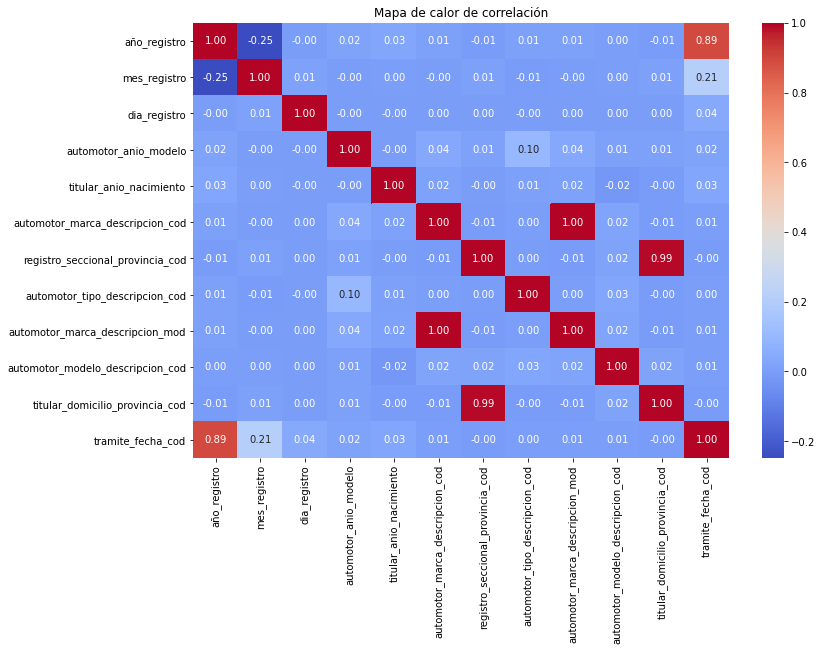

In [75]:
import pandas as pd
import glob
import os
pd.set_option('display.max_columns', None)
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = transf.corr()

# msotramos la matriz de correlación
print("Matriz de correlación:")
#print(correlation_matrix)

# Obtenemos la correlación específica entre las variables
corr_var1_var2 = correlation_matrix.loc['año_registro', 'automotor_anio_modelo']
#print(f"Correlación entre Variable1 y Variable2: {corr_var1_var2}")




# Visualizar la matriz de correlación en un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

### Encontramos correlaciones entre:
#### 'año_registro' y 'tramite_fecha', 
####    'registro_seccional_provincia' y 'titular_domicilio_provincia', 
####    'automotor_marca_descripcion' y 'automotor_marca_descripcion_cod'
    
###  Esos campos intuitivamente tenian un sentido de correlacion y pudimos comprobar que asi es.

In [57]:
#examen numérico
# Crear un DataFrame de ejemplo
data = {'Variable1': [1, 2, 3, 4, 5],
        'Variable2': [2, 4, 5, 7, 9],
        'Variable3': [3, 6, 9, 12, 15]}

df = pd.DataFrame(data)

df=transferencias[['año_registro','mes_registro','dia_registro','automotor_anio_modelo','titular_anio_nacimiento']]
# generamos una matriz de correlación
correlation_matrix = df.corr()

# msotramos la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Obtenemos la correlación específica entre las variables
corr_var1_var2 = correlation_matrix.loc['año_registro', 'automotor_anio_modelo']
print(f"Correlación entre Variable1 y Variable2: {corr_var1_var2}")

Matriz de correlación:
                         año_registro  mes_registro  dia_registro  \
año_registro                 1.000000     -0.247170     -0.002003   
mes_registro                -0.247170      1.000000      0.012892   
dia_registro                -0.002003      0.012892      1.000000   
automotor_anio_modelo        0.018868     -0.003087     -0.000807   
titular_anio_nacimiento      0.026230      0.001295     -0.000072   

                         automotor_anio_modelo  titular_anio_nacimiento  
año_registro                          0.018868                 0.026230  
mes_registro                         -0.003087                 0.001295  
dia_registro                         -0.000807                -0.000072  
automotor_anio_modelo                 1.000000                -0.001085  
titular_anio_nacimiento              -0.001085                 1.000000  
Correlación entre Variable1 y Variable2: 0.018867537959710773


# Ejercicio 2: 
### Habiendo analizado el dataset del DNRPA plantee al menos 5 preguntas que podrían ser de interés para ### ser respondidas en busca de algún tipo de conocimiento.

## RTA

### Respecto a tendencias historicas:

#### ¿Cuál es la evolución histórica de las transferencias de vehículos en Argentina a lo largo de los últimos años?
#### ¿Existe estacionalidad en las transferencias de vehículos, manifestada en patrones mensuales o estacionales de #### incremento o decrecimiento?

### Respecto a marcas y modelos populares:

#### ¿Cuáles son las marcas de automóviles más frecuentemente transferidas en el mercado argentino?
#### ¿Existen modelos específicos con mayor frecuencia de transferencia?

### Respecto a la relación entre año de Modelo y su uso:

#### ¿Qué patrones se observan respecto a la durabilidad y cambio de uso según la antigüedad del vehículo?

### Respecto a lo Geográficao

#### ¿Cuáles son las regiones o provincias de Argentina con mayor actividad en transferencias de vehículos?
#### ¿Se observan variaciones significativas en las preferencias de marca/modelo entre diferentes áreas geográficas del país?

### Demografía de los Titulares:

#### ¿Cómo se distribuye la titularidad de los vehículos en términos de edad y género?
